In [1]:
import torch

from utils import (
    vision,
    modules,
    custom_dataset, 
)

# Parameters

In [2]:
IMG_PREFIX = "data/train/"
VALID_ANN_FILE = "data/valid_coco.json"
config = "config.py"
pth = "work_dir/RTMDet_model.pt"

In [3]:
model = modules.Model(config)
model.load_state_dict(torch.load(pth, "cpu")["model"])
model.eval();

All Keys Matching


In [4]:
valid_dataloader = torch.utils.data.DataLoader(
    custom_dataset.CustomDatset(
        VALID_ANN_FILE,
        IMG_PREFIX,
        None,
    ),
    batch_size=1,
    shuffle=True,
    num_workers=1,
    collate_fn=custom_dataset.collate_fn,
)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


# Vision Image

/home/zhy/miniconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


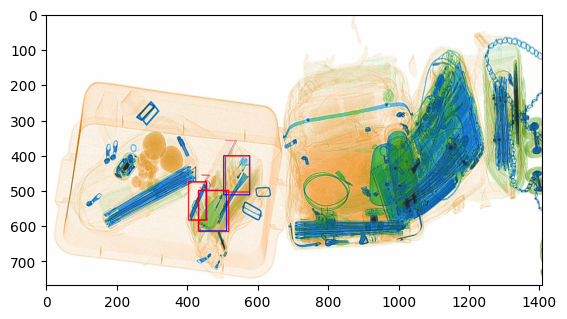

In [5]:
batch = next(iter(valid_dataloader))
output = model(batch, "predict")
vision.vision_output0(batch, output, .65)